# Libraries Import

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from object import object_cache

# Dataset Import

In [75]:
df = pd.read_csv('clean_dataset.csv')

# Dataset Exploration

In [76]:
df.shape

(73118, 2553)

In [77]:
df.describe(include='all')

,aa,aa aa,aa aa aa,ab,abandon,ability,able,able play,absolute,absolutely,...,youtu,youtube,youtube com,youtube com watch,yu,yu yu,zero,zombie,zone,zoom
count,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,...,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000,73118.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.000084,0.000008,0.000008,0.000270,0.000299,0.000408,0.001451,0.000268,0.001283,0.002224,...,0.005013,0.004148,0.001598,0.001229,0.000294,0.000123,0.000650,0.000879,0.000522,0.000371
std,0.006438,0.002258,0.002229,0.011383,0.010151,0.012506,0.021430,0.009193,0.025237,0.029642,...,0.042989,0.036290,0.022452,0.019350,0.010261,0.004860,0.015596,0.022022,0.015917,0.013035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73118 entries, 0 to 73117
Columns: 2553 entries, aa to zoom
dtypes: float64(2552), object(1)
memory usage: 1.4+ GB


In [79]:
df

,aa,aa aa,aa aa aa,ab,abandon,ability,able,able play,absolute,absolutely,...,youtu,youtube,youtube com,youtube com watch,yu,yu yu,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dataset Preprocessing

In [80]:
# use only labels 'Negative', 'Positive'

df = df[(df['target'] == 'Negative') | (df['target'] == 'Positive')]

In [81]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['target'])
df['target'] = labelEncoder.transform(df['target'])

C:\Users\yosef\AppData\Local\Temp\ipykernel_1948\354083956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = labelEncoder.transform(df['target'])


In [82]:
df['target']

0        1
1        1
2        1
3        1
4        1
        ..
73110    1
73111    0
73112    1
73115    1
73116    1
Name: target, Length: 42483, dtype: int64

# Train Test Split

In [116]:
X = df.drop('target', axis=1).values
y = df.loc[:,'target'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3, )

# Models

Declare

In [118]:
models_list = []

In [ ]:
models_list.append([LogisticRegression(),        "LogisticRegression"])

models_list.append([DecisionTreeClassifier(),    "DecisionTreeClassifier"])

models_list.append([RandomForestClassifier(),    "RandomForestClassifier"])

models_list.append([SVC(kernel='linear',probability=True),        "SVC_linear"])
# models_list.append([SVC(kernel='poly',probability=True),          "SVC_poly_poly"])
# models_list.append([SVC(kernel='rbf',probability=True),           "SVC_rbf"])
# models_list.append([SVC(kernel='sigmoid',probability=True),       "SVC_sigmoid"])

models_list.append([MultinomialNB(),             "MultinomialNB"])
models_list.append([GaussianNB(),                "GaussianNB"])
models_list.append([BernoulliNB(),               "BernoulliNB"])

models_list.append([KNeighborsClassifier(),      "KNeighborsClassifier"])

Train & Cache

In [120]:
def trainModel(model):
    model.fit(X_train, y_train)
    return model

In [121]:
for i,(model, model_name) in enumerate(models_list):
    print("Train Model:",model_name)
    models_list[i][0] = object_cache.loadObject(f"{model_name}_cache",lambda: trainModel(model))
    object_cache.saveObject(models_list[i][0], f"{model_name}_cache")
    print('')

Train Model: LogisticRegression
Object successfully loaded from cache\LogisticRegression_cache.pickle
Object successfully saved to cache\LogisticRegression_cache.pickle

Train Model: DecisionTreeClassifier
Object successfully loaded from cache\DecisionTreeClassifier_cache.pickle
Object successfully saved to cache\DecisionTreeClassifier_cache.pickle

Train Model: RandomForestClassifier
Object successfully loaded from cache\RandomForestClassifier_cache.pickle
Object successfully saved to cache\RandomForestClassifier_cache.pickle

Train Model: SVC_linear
Object successfully loaded from cache\SVC_linear_cache.pickle
Object successfully saved to cache\SVC_linear_cache.pickle

Train Model: MultinomialNB
Object successfully loaded from cache\MultinomialNB_cache.pickle
Object successfully saved to cache\MultinomialNB_cache.pickle

Train Model: GaussianNB
Object successfully loaded from cache\GaussianNB_cache.pickle
Object successfully saved to cache\GaussianNB_cache.pickle

Train Model: Bernou

Prediction

In [122]:
try:
    evaluation_dataset = pd.read_csv('evaluation_dataset.csv')
except:
    evaluation_dataset = None

In [123]:
def evaluate():
    global evaluation_dataset

    model_names = []

    accuracy_train_list = []
    recall_train_list = []
    precision_train_list = []
    f1_train_list = []
    
    accuracy_test_list = []
    recall_test_list = []
    precision_test_list = []
    f1_test_list = []

    for model, model_name in models_list:
        if evaluation_dataset is not None and model_name in evaluation_dataset['model_name'].values:
            print(f'Model {model_name} is tested before')
            continue

        print("Test Model",model_name)
        model_names.append(model_name)
        
        y_predict = model.predict(X_train) 
        accuracy_train_list.append(accuracy_score(y_train, y_predict))
        recall_train_list.append(recall_score(y_train, y_predict))
        precision_train_list.append(precision_score(y_train, y_predict))
        f1_train_list.append(f1_score(y_train, y_predict))
    
        y_predict = model.predict(X_test) 
        accuracy_test_list.append(accuracy_score(y_test, y_predict))
        recall_test_list.append(recall_score(y_test, y_predict))
        precision_test_list.append(precision_score(y_test, y_predict))
        f1_test_list.append(f1_score(y_test, y_predict))

    if len(model_names) > 0:  
        newpd = pd.concat([
                pd.DataFrame({
                    "model_name": model_names,
                    
                    "accuracy": accuracy_train_list,
                    "recall": recall_train_list,
                    "precision": precision_train_list,
                    "f1": f1_train_list,
                    
                    "type": ['train'] * len(model_names)
                }),
                pd.DataFrame({
                    "model_name": model_names,
                    
                    "accuracy": accuracy_test_list,
                    "recall": recall_test_list,
                    "precision": precision_test_list,
                    "f1": f1_test_list,
                    
                    "type": ['test'] * len(model_names)
                })
            ], axis=1)
        
        if evaluation_dataset is None:
            evaluation_dataset = newpd
        else:
            evaluation_dataset = pd.concat([evaluation_dataset, newpd], axis=1)

In [124]:
evaluate()

Model LogisticRegression is tested before
Model DecisionTreeClassifier is tested before
Model RandomForestClassifier is tested before
Model SVC_linear is tested before
Model MultinomialNB is tested before
Model GaussianNB is tested before
Model BernoulliNB is tested before
Model KNeighborsClassifier is tested before


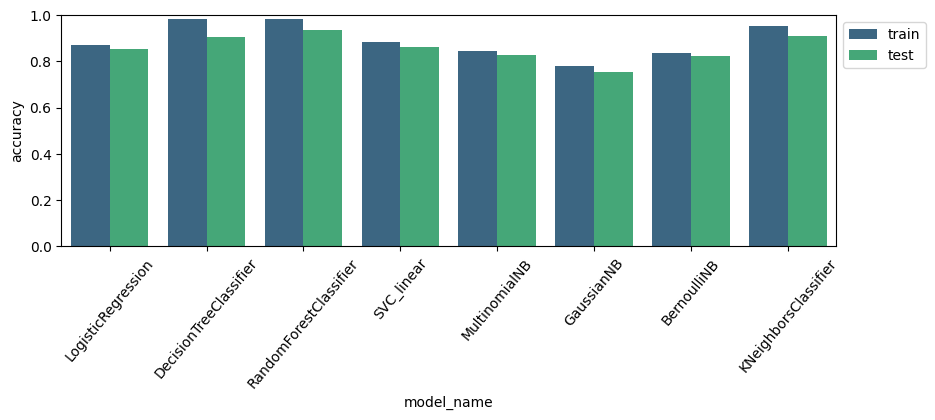

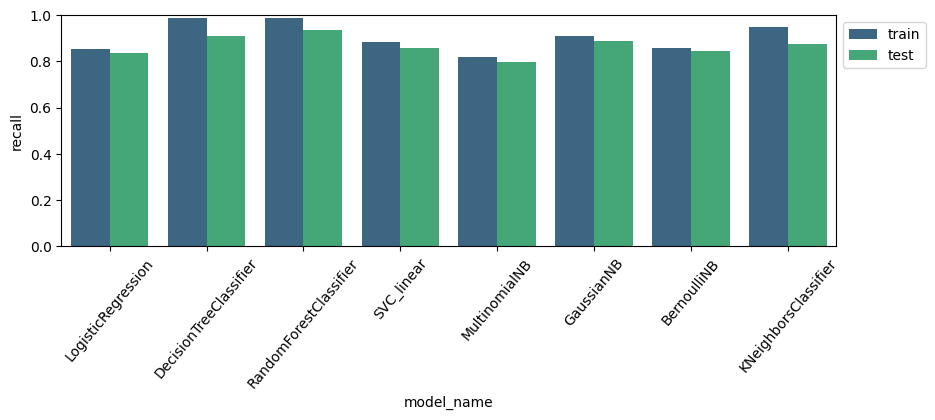

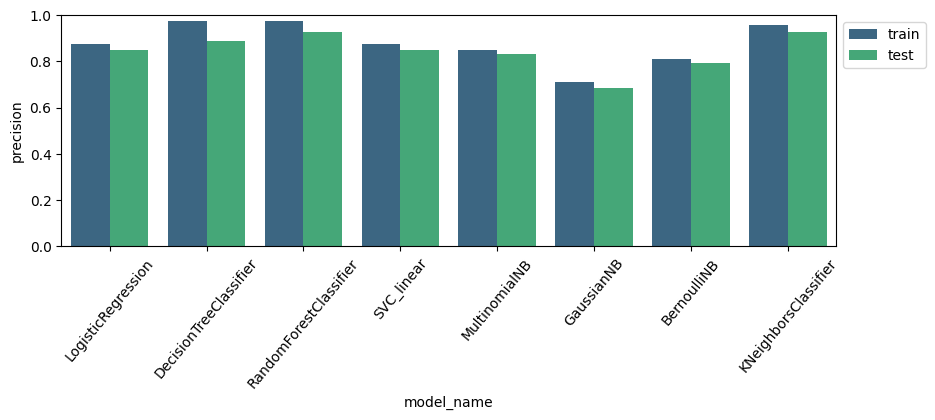

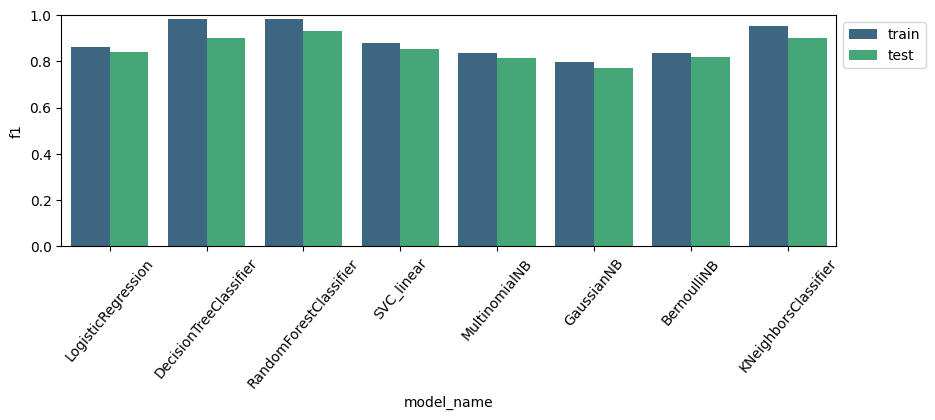

In [129]:
for y_name in ['accuracy','recall','precision','f1']:
    plt.figure(figsize=(10,3))
    sns.barplot(data=evaluation_dataset,x='model_name', y=y_name, hue='type', palette='viridis')
    plt.ylim((0,1))
    plt.xticks(rotation= 50)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [126]:
evaluation_dataset[evaluation_dataset['type'] == 'test'].sort_values(by='f1', ascending=False)

,model_name,accuracy,recall,precision,f1,type
9,RandomForestClassifier,0.936053,0.937677,0.927655,0.932639,test
15,KNeighborsClassifier,0.908513,0.874356,0.927702,0.900240,test
8,DecisionTreeClassifier,0.903570,0.911085,0.887630,0.899204,test
10,SVC_linear,0.860651,0.858235,0.848365,0.853272,test
7,LogisticRegression,0.852805,0.834137,0.851111,0.842538,test
13,BernoulliNB,0.823696,0.845272,0.794439,0.819068,test
11,MultinomialNB,0.828089,0.798571,0.830740,0.814338,test
12,GaussianNB,0.752923,0.886654,0.683799,0.772125,test


# Saving

In [127]:
evaluation_dataset.to_csv('evaluation_dataset.csv')